<a href="https://colab.research.google.com/github/kariukidan/Sigma_academy/blob/main/Copy_of_0306.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

 #Set visualization style
sns.set(style="whitegrid")


In [ ]:
data = pd.read_csv('netflix_titles.csv')

In [ ]:
# Step 1: Exploratory Data Analysis (EDA)
# 1. Overview of the data
print("Data Overview:")
print(data.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# 2. Handling missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
data.duplicated().sum()

0

In [ ]:
# Strip spáces
data['date_added'] = data['date_added'].str.strip()

In [ ]:
data['date_added'] = pd.to_datetime((data['date_added']), errors = 'coerce')

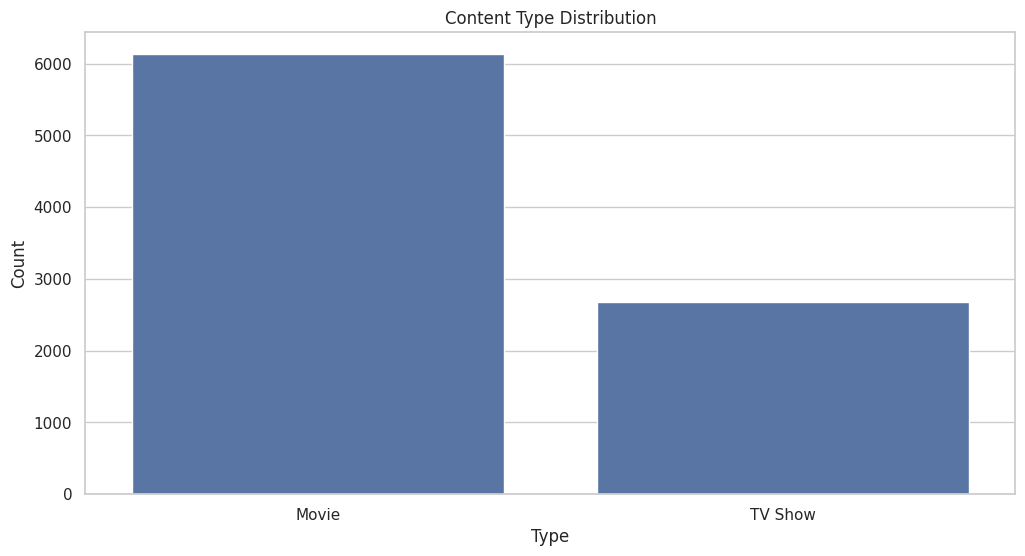

In [ ]:
# 3. Analysis of content types
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=data)
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

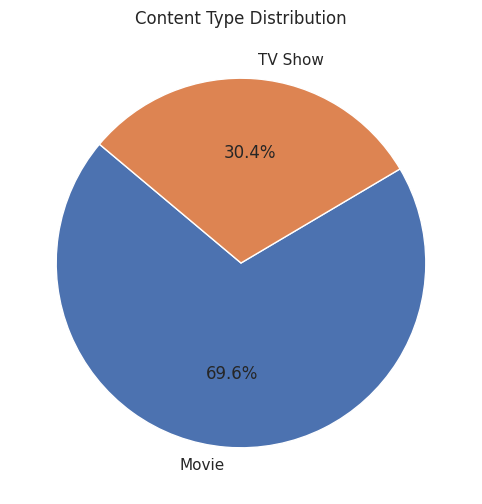

In [ ]:
# or Piechart
type_counts = data['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Content Type Distribution')
plt.show()

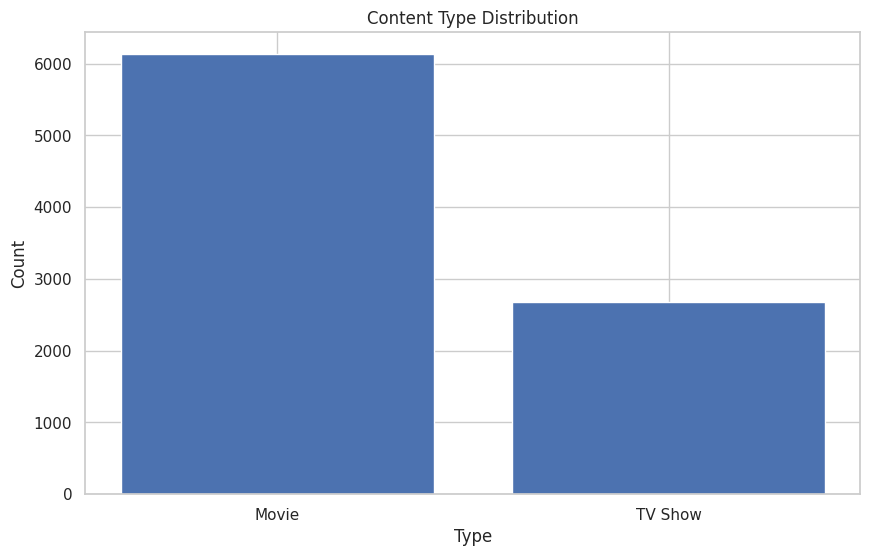

In [ ]:
# 3. Analysis of content types
plt.figure(figsize=(10, 6))
plt.bar(x=type_counts.index, height=type_counts.values)
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

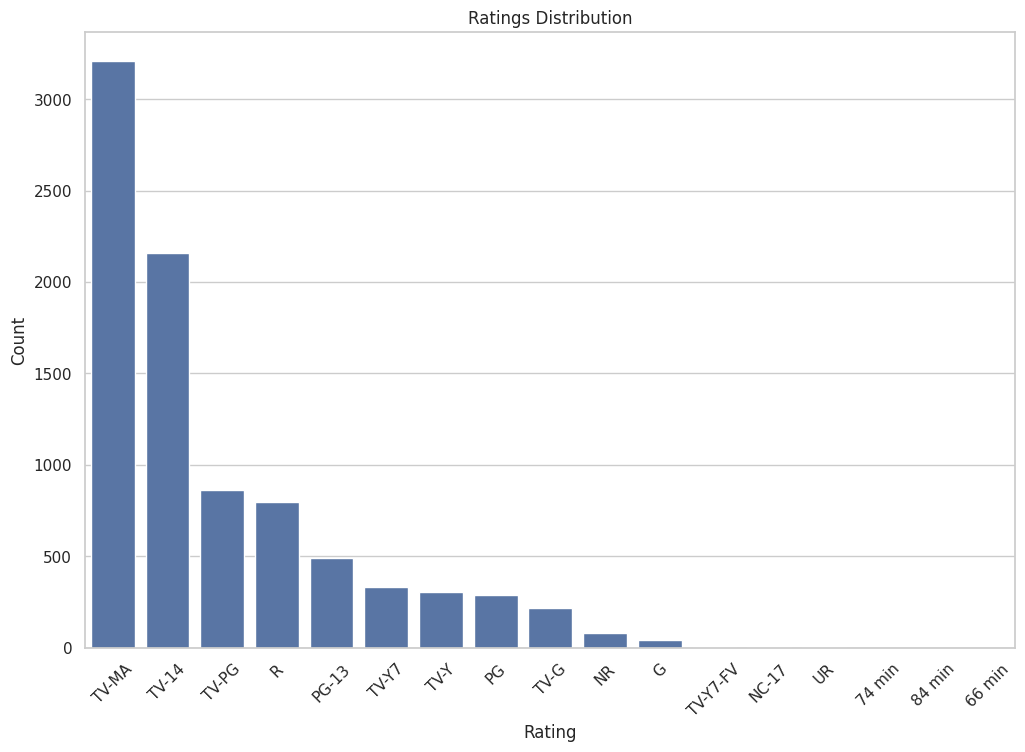

In [ ]:
# 4. Analysis of ratings distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

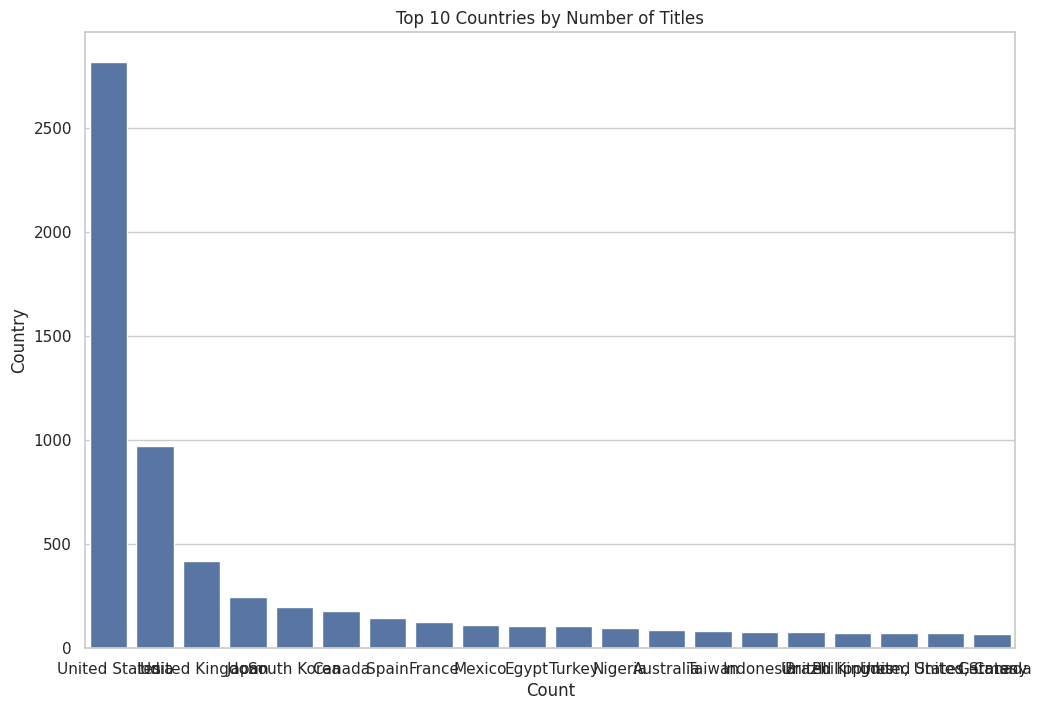

In [ ]:
# 5. Analysis of country distribution
top_countries = data['country'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


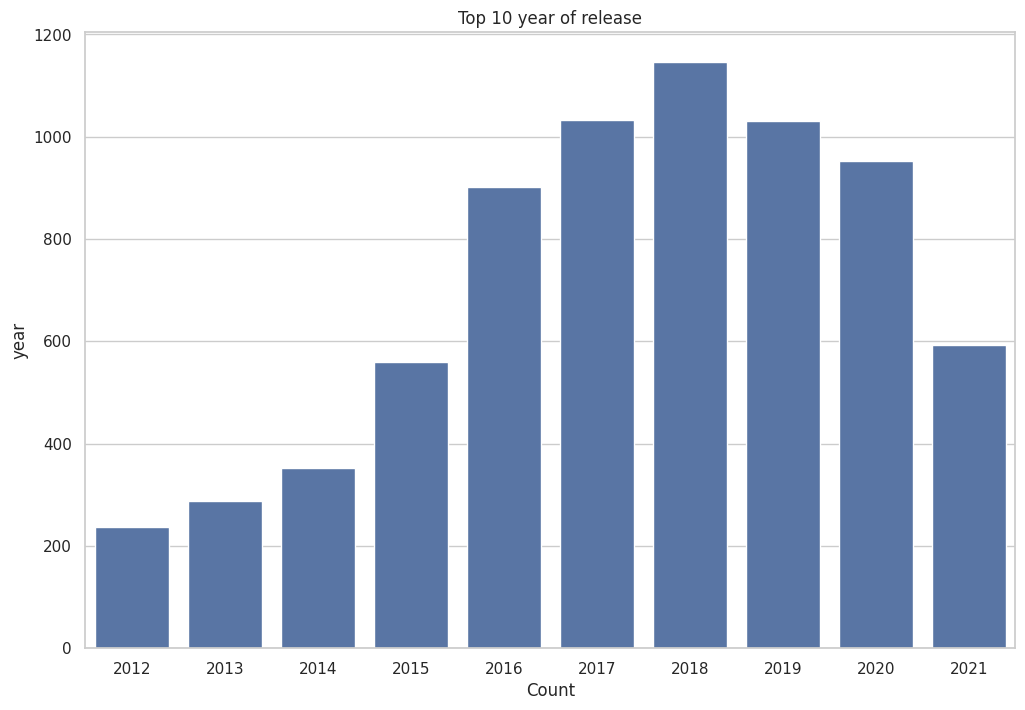

In [ ]:
# 5. Analysis of year distribution
release_year = data['release_year'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=release_year.index, y=release_year.values)
plt.title('Top 10 year of release')
plt.xlabel('Count')
plt.ylabel('year')
plt.show()

In [ ]:
# Step 2: Data Cleaning

# Fill missing values in 'country' with 'Unknown'
data['country'] = data['country'].fillna('Unknown')

In [ ]:
unknownCountries = data['country'].value_counts()['Unknown']
print(unknownCountries)

831


In [ ]:
# Fill missing values in 'director' and 'cast' with 'Unknown'
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Unknown')

In [ ]:
unknowndirector = data['director'].value_counts()['Unknown']
unknowncast = data['cast'].value_counts()['Unknown']
print(unknowndirector)
print(unknowncast)

2634
825


In [ ]:
duration_counts = data['duration'].value_counts()
print(duration_counts)

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64


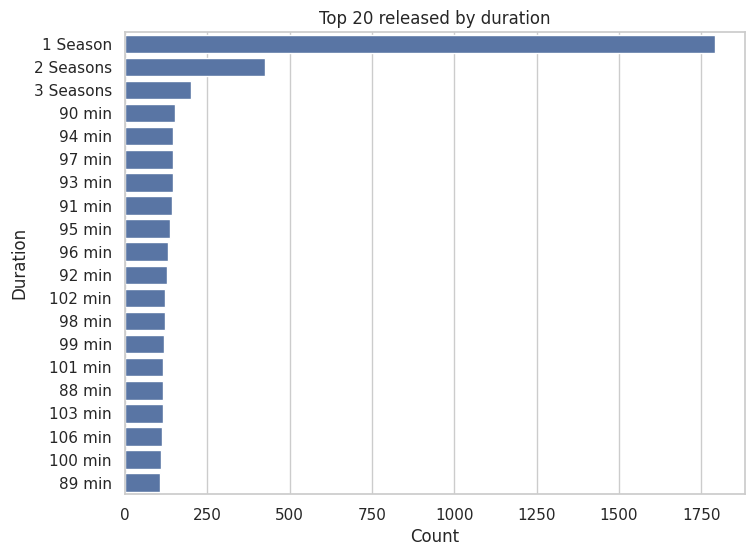

In [ ]:
duration = data['duration'].value_counts().head(20)
plt.figure(figsize=(8, 6))
sns.barplot(x=duration.values, y=duration.index)
plt.title('Top 20 released by duration')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()

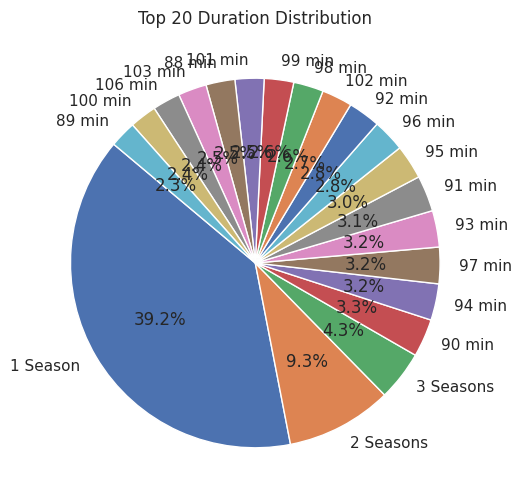

In [ ]:
duration = data['duration'].value_counts().head(20)
plt.figure(figsize=(8, 6))
plt.pie(duration, labels=duration.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 20 Duration Distribution')
plt.show()

<Axes: ylabel='count'>

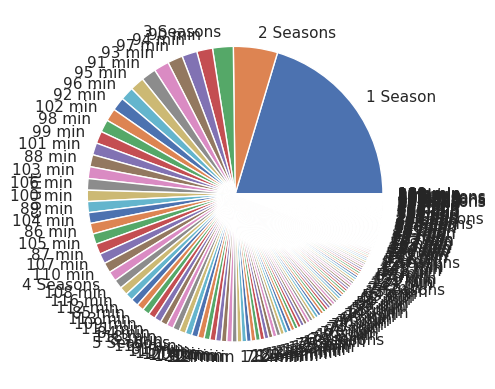

In [ ]:
data['duration'].value_counts(normalize=False).plot.pie()

In [ ]:
# Drop rows with missing 'rating' and 'duration'
data = data.dropna(subset=['rating', 'duration'])

In [ ]:
# Step 3: Calculation of Metrics

# 1. Number of content by type
content_type_counts = data['type'].value_counts()
print("\nNumber of Content by Type:")
print(content_type_counts)



Number of Content by Type:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [ ]:
# 2. Average duration of movies
# Extract numeric duration from 'duration'
data['duration_minutes'] = data['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else None)
average_movie_duration = data[data['type'] == 'Movie']['duration_minutes'].mean()
print("\nAverage Duration of Movies (in minutes):")
print(average_movie_duration)


Average Duration of Movies (in minutes):
99.58488410055502


In [ ]:
# Strip spáces
data['date_added'] = data['date_added'].str.strip()

In [ ]:
data['date_added'] = pd.to_datetime((data['date_added']), errors = 'coerce')

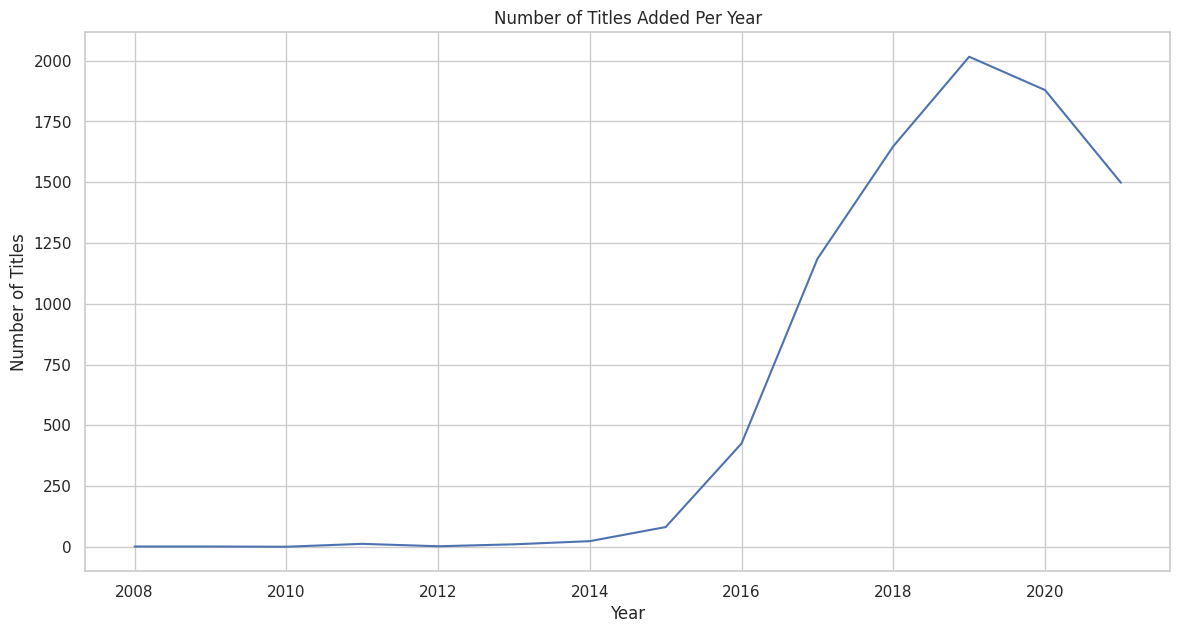

In [ ]:
# 3. Frequency of content added by year
data['year_added'] = data['date_added'].dt.year
content_added_per_year = data['year_added'].value_counts().sort_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x=content_added_per_year.index, y=content_added_per_year.values)
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

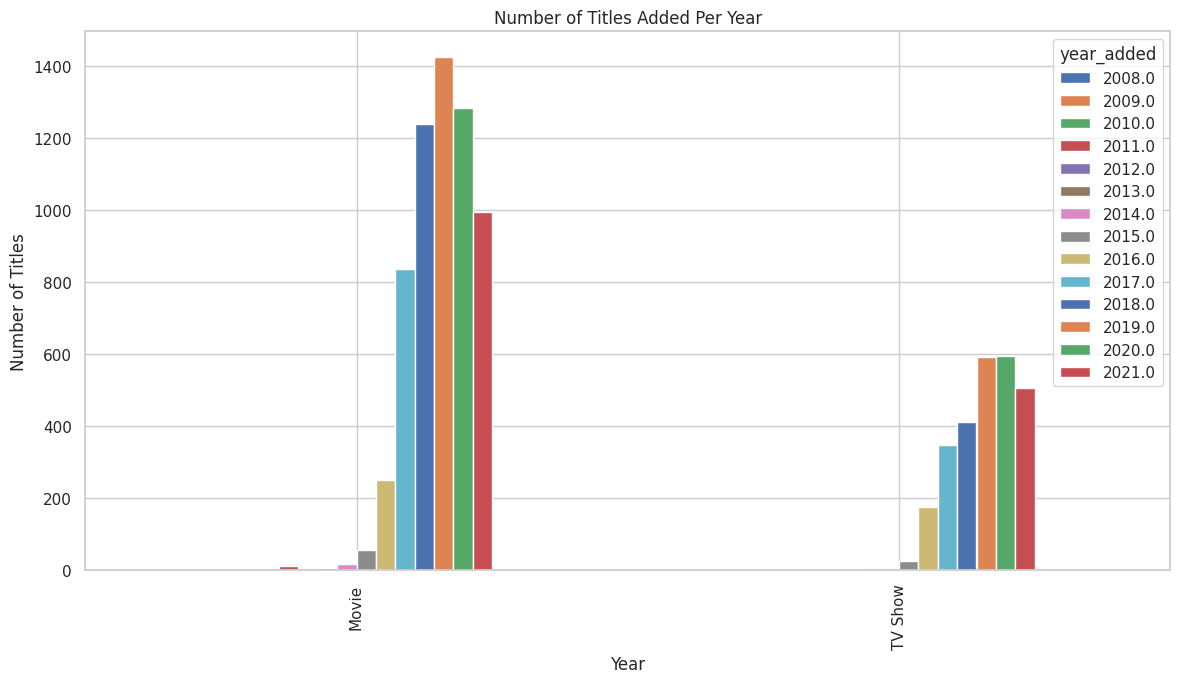

In [ ]:
# 3. Frequency of content added by year
data['year_added'] = data['date_added'].dt.year
content_added_per_year = data.groupby(['type','year_added']).size().unstack(fill_value=0)
content_added_per_year.plot(kind='bar',figsize=(14, 7))
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

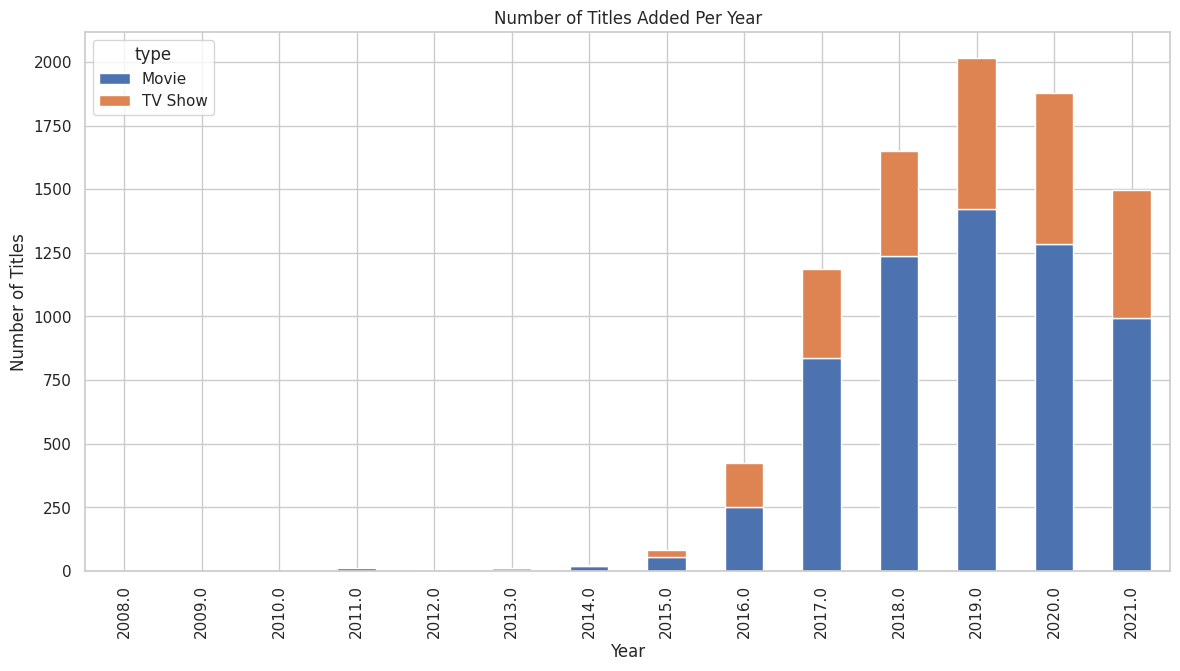

In [ ]:
# 3. Frequency of content added by year
data['year_added'] = data['date_added'].dt.year
content_added_per_year = data.groupby(['year_added','type']).size().unstack(fill_value=0)
content_added_per_year.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()